# Welcome to the Data cleaning, PRE-Processing and Visualisation         
*By: Omkar Haryan*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv("data.csv")
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [7]:
print(data.shape)
data.info()

(11864, 106)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11864 entries, 0 to 11863
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 9.6+ MB


In [8]:
data.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            1
lcb           1
cb            1
rcb           1
rb            1
Length: 106, dtype: int64

In [9]:
missing_values = data.isnull().sum()
print(missing_values[missing_values>0])

club_name                 183
league_name               183
league_rank               183
release_clause_eur        691
player_tags             10558
team_position             183
team_jersey_number        183
loaned_from             11365
joined                    682
contract_valid_until      183
nation_position         10794
nation_jersey_number    10794
pace                     1126
shooting                 1126
passing                  1126
dribbling                1126
defending                1126
physic                   1126
gk_diving               10738
gk_handling             10738
gk_kicking              10738
gk_reflexes             10738
gk_speed                10738
gk_positioning          10738
player_traits            4759
defending_marking       11864
lb                          1
lcb                         1
cb                          1
rcb                         1
rb                          1
dtype: int64


In [12]:
cols = ["player_tags","loaned_from","nation_position","nation_jersey_number","gk_diving","gk_handling","gk_kicking","gk_reflexes","gk_speed","gk_positioning","defending_marking"]
data.drop(cols,axis=1, inplace=True)
print(data.shape)

(11864, 95)


In [14]:
rowscol=["lb","lcb","cb","rcb","rb"]
data.dropna(subset=rowscol, inplace = True)
print(data.shape)

(11863, 95)


In [15]:
percent= data.isnull().sum()/data.shape[0]*100
print(percent[percent>0])

club_name                1.542611
league_name              1.542611
league_rank              1.542611
release_clause_eur       5.824834
team_position            1.542611
team_jersey_number       1.542611
joined                   5.748967
contract_valid_until     1.542611
pace                     9.491697
shooting                 9.491697
passing                  9.491697
dribbling                9.491697
defending                9.491697
physic                   9.491697
player_traits           40.116328
dtype: float64


In [16]:
rowscol2=["club_name","league_name","league_rank","team_position","team_jersey_number","contract_valid_until"]
data.dropna(subset=rowscol2, inplace = True)
print(data.shape)

(11680, 95)


In [18]:
data["physic"].fillna(data["physic"].median(), inplace=True)
data["defending"].fillna(data["defending"].median(), inplace=True)
data["dribbling"].fillna(data["dribbling"].median(), inplace=True)
data["passing"].fillna(data["passing"].median(), inplace=True)
data["shooting"].fillna(data["shooting"].median(), inplace=True)
data["pace"].fillna(data["pace"].median(), inplace=True)
#data["joined"].fillna(data["joined"].median(), inplace=True)
data["release_clause_eur"].fillna(data["release_clause_eur"].median(), inplace=True)

In [19]:
data.duplicated().sum()

0

In [20]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'team_position', 'team_jersey_number', 'joined',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', '

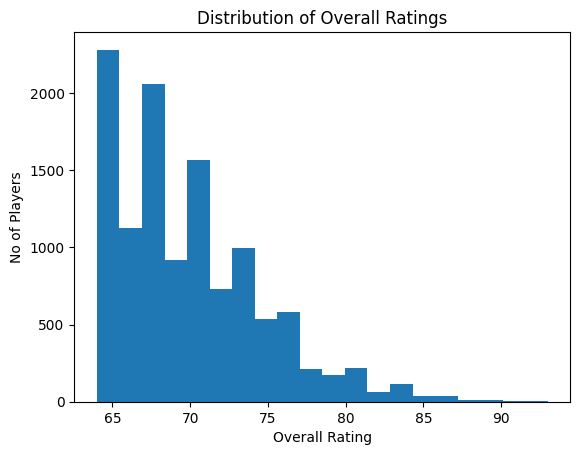

In [25]:
plt.hist(data["overall"],bins=20)
plt.xlabel("Overall Rating")
plt.ylabel("No of Players")
plt.title("Distribution of Overall Ratings")
plt.show()

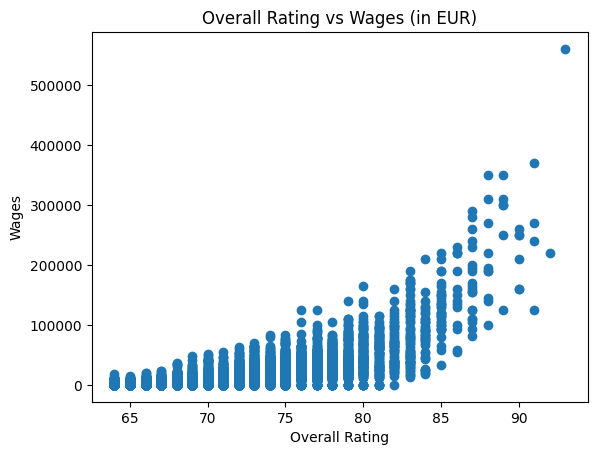

In [29]:
plt.scatter(data["overall"],data["wage_eur"])
plt.xlabel("Overall Rating")                    #this will be useful in finding outliers, like there might be some less number of superstar players among all
plt.ylabel("Wages")
plt.title("Overall Rating vs Wages (in EUR)")
plt.show()

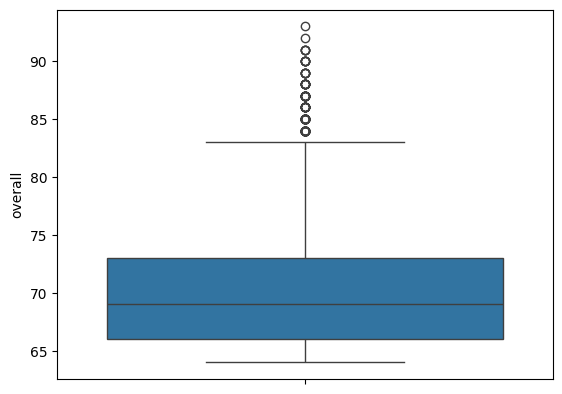

In [30]:
sns.boxplot(data["overall"])
plt.show()

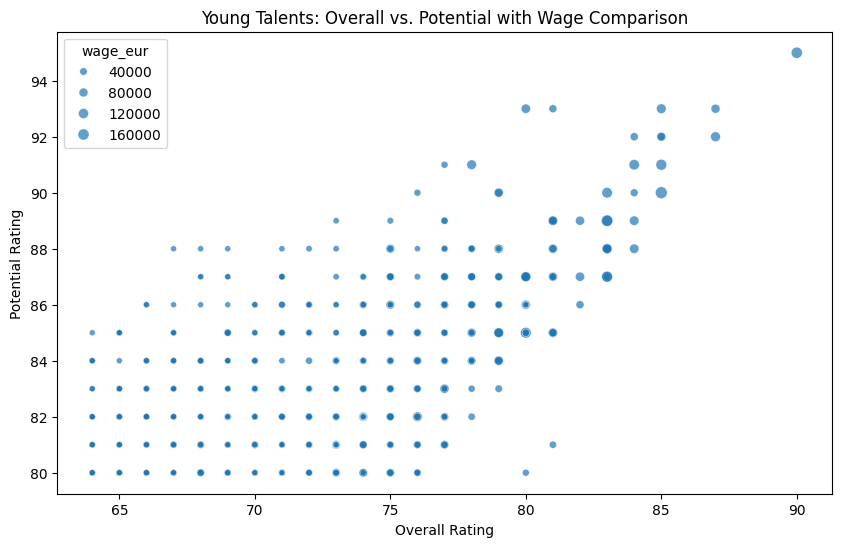

In [34]:
# Filter data for young players with high potential
young_talents = data[(data['age'] <= 23) & (data['potential'] >= 80)]

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall', y='potential', size='wage_eur', data=young_talents, alpha=0.7)
plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')
plt.title('Young Talents: Overall vs. Potential with Wage Comparison')
plt.show()

In [35]:
import plotly.express as px

# Assuming 'young_talents' DataFrame from previous response
fig = px.scatter(young_talents, x='overall', y='potential', size='wage_eur',
                 hover_name='short_name',  # Display player's short name on hover
                 title='Young Talents: Overall vs. Potential with Wage Comparison')
fig.show()

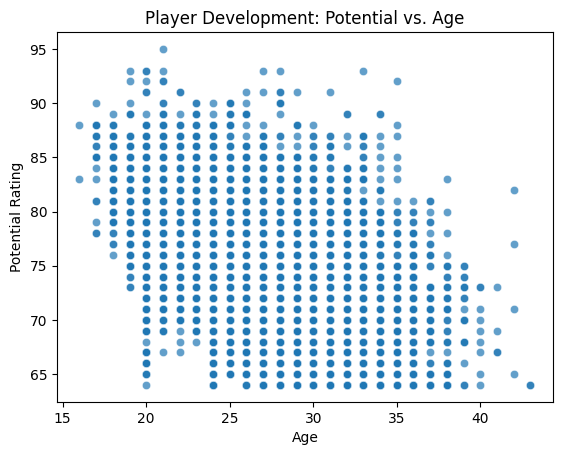

In [49]:
sns.scatterplot(x=data['age'], y=data['potential'], alpha=0.7)
plt.xlabel('Age')                                   #here we can see how players of different range perform and how over some age the rating drops
plt.ylabel('Potential Rating')
plt.title('Player Development: Potential vs. Age')  #the colour represents density of no of players in that section
plt.show()

In [40]:
data['age'].unique()
data['age'].value_counts().sort_index()

age
16       2
17      22
18      63
19     175
20     442
21     530
22     752
23     889
24    1011
25     897
26     986
27     960
28    1045
29     849
30     752
31     627
32     519
33     405
34     303
35     181
36     125
37      64
38      43
39      19
40       9
41       4
42       4
43       2
Name: count, dtype: int64

In [48]:
import plotly.graph_objects as go

player1_data = data.iloc[2100]
player2_data = data.iloc[1000]

categories = ['overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']  # Choose attributes for the radar chart

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r = player1_data[categories].values.tolist(),
      theta = categories,
      fill='toself',
      name=player1_data['short_name']
))
fig.add_trace(go.Scatterpolar(
      r = player2_data[categories].values.tolist(),
      theta = categories,
      fill='toself',
      name=player2_data['short_name']
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      showticklabels=False
    ),
    angularaxis=dict(
      tickfont=dict(
        size=10
      )
    )
  ),
  showlegend=True
)

fig.show()

# Thankyou for reviewing my notebook.